Creating synthetic dataset at 'synthetic_medical_images'...
Synthetic dataset created successfully.
Loading data from 'synthetic_medical_images'...
Loaded 400 images.
Training data shape: (320, 128, 128, 3)
Testing data shape: (80, 128, 128, 3)
Building the CNN model for binary classification...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model built and compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6106 - loss: 0.5762 - val_accuracy: 0.9062 - val_loss: 0.1733
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9370 - loss: 0.1536 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9981 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 988ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 2.3409e-04
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 983ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.2956e-05
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 7.7297e-04 - val_accuracy: 1.0000 - val_loss: 2.8006e-05
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 8.2936e-05 - val_accuracy: 1.0000 - val_loss: 2.7512e-05
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 963ms/step - accuracy: 1.0000 - loss: 

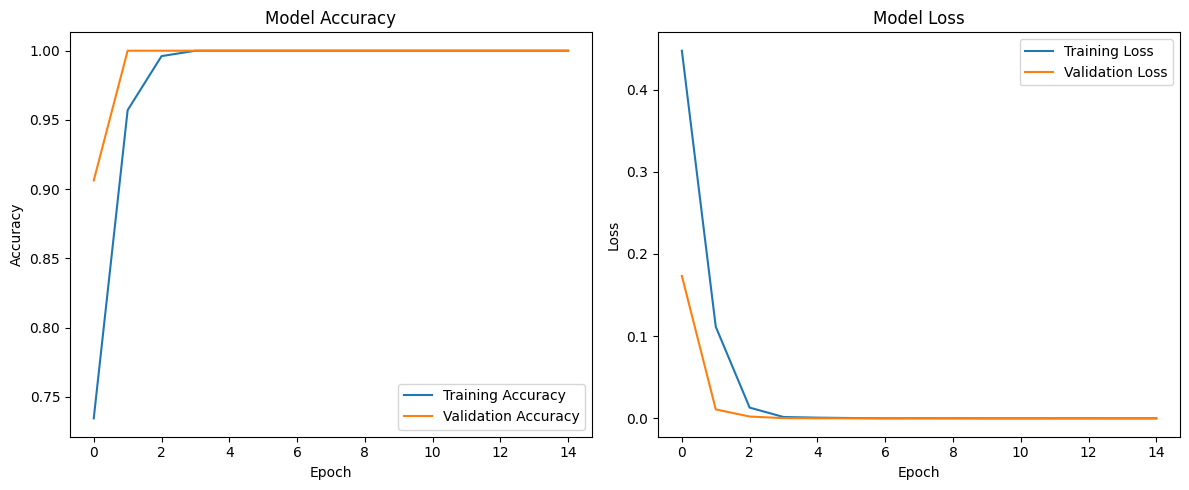

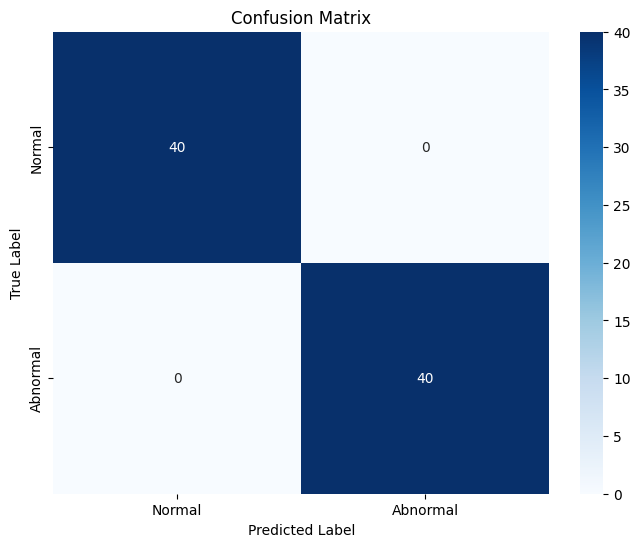

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

def create_synthetic_dataset(base_dir='synthetic_medical_images', num_samples_per_class=200, img_size=(128, 128)):
    print(f"Creating synthetic dataset at '{base_dir}'...")
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)

    os.makedirs(os.path.join(base_dir, 'Normal'))
    os.makedirs(os.path.join(base_dir, 'Abnormal'))

    # Create 'Normal' images (e.g., a simple circle)
    for i in range(num_samples_per_class):
        img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
        center_x, center_y = img_size[1] // 2, img_size[0] // 2
        radius = np.random.randint(20, 40)
        color = (255, 255, 255) # White
        cv2.circle(img, (center_x, center_y), radius, color, -1)

        # Add some noise
        noise = np.random.randint(0, 25, img.shape, dtype=np.uint8)
        img = cv2.add(img, noise)

        cv2.imwrite(os.path.join(base_dir, 'Normal', f'normal_{i}.png'), img)

    # Create 'Abnormal' images (e.g., a rectangle instead of a circle)
    for i in range(num_samples_per_class):
        img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
        pt1_x = np.random.randint(10, 40)
        pt1_y = np.random.randint(10, 40)
        pt2_x = img_size[1] - pt1_x
        pt2_y = img_size[0] - pt1_y
        color = (255, 255, 255) # White
        cv2.rectangle(img, (pt1_x, pt1_y), (pt2_x, pt2_y), color, -1)

        # Add some noise
        noise = np.random.randint(0, 25, img.shape, dtype=np.uint8)
        img = cv2.add(img, noise)

        cv2.imwrite(os.path.join(base_dir, 'Abnormal', f'abnormal_{i}.png'), img)

    print("Synthetic dataset created successfully.")

def load_data_from_folders(base_dir, class_map, img_size=(128, 128)):
    print(f"Loading data from '{base_dir}'...")
    images = []
    labels = []

    for class_name, class_label in class_map.items():
        folder_path = os.path.join(base_dir, class_name)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(class_label)

    print(f"Loaded {len(images)} images.")
    return np.array(images), np.array(labels)

def build_cnn_model(input_shape=(128, 128, 3)):
    print("Building the CNN model for binary classification...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    print("Model built and compiled successfully.")
    model.summary()
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

if __name__ == '__main__':
    IMAGE_SIZE = (128, 128)
    DATA_DIR = 'synthetic_medical_images'

    create_synthetic_dataset(base_dir=DATA_DIR)

    class_map = {'Normal': 0, 'Abnormal': 1}
    class_names = list(class_map.keys())

    images, labels = load_data_from_folders(DATA_DIR, class_map, img_size=IMAGE_SIZE)

    images, labels = shuffle(images, labels, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    model = build_cnn_model(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

    print("\nStarting model training...")
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_split=0.2 # Use part of training data for validation
    )
    print("Model training finished.")

    print("\nEvaluating model on the test set...")
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    plot_training_history(history)
    plot_confusion_matrix(y_test, y_pred, class_names)